In [1]:
# To your code repository
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned"

/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned


In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"
import torch

In [2]:
!pip install datasets
# !pip install accelerate -U
!pip install transformers[torch]

In [3]:
from CanineHangmanPlayer import CanineHangmanPlayer
import numpy as np

tokenizer_config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

2025-05-16 15:40:32.198157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-16 15:40:32.198282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-16 15:40:32.277867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 15:40:32.443084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-16 15:40:34.099291: W tensorflow/compiler/tf2

## Set-up training args for our pre-training task


In [4]:
# Set-up a Hangman agent that we will train
pre_train_model = CanineHangmanPlayer('canine-pretrained-hangman-log/checkpoint-30077')#"/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned/canine-pretrained-hangman=checkpoints/canine-pretrained-hangman-checkpoint-7")

In [5]:
pre_train_model.set_training(2e-5, 2e-4)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [11]:
import random
with open('final.txt', 'r') as f:
    train = f.read().splitlines()
random.shuffle(train)
# print(train_words[:15])

In [12]:
print(len(train))

224818


In [13]:
val=train[:10000]
train=train[10000:]

Map:   0%|          | 0/106778 [00:00<?, ? examples/s]

Epoch 1/2


Map:   0%|          | 0/2292862 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,F1,Accuracy
1,0.126900,0.125759,0.250987,0.349098


Validation accuracy: 0.568
Epoch 2/2


Map:   0%|          | 0/2291036 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,F1,Accuracy
1,0.126600,0.125596,0.251273,0.351336


Validation accuracy: 0.584


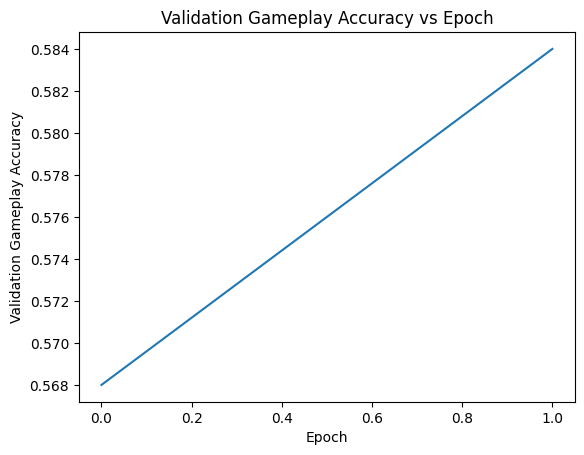

In [14]:
pre_train_model.pretrain_model(train, val, 2, 1000)

In [16]:
pre_train_model.model.save_pretrained(f"10epoch")